In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_original=pd.read_csv('dataset_6.csv')

In [3]:
data_original=data_original[data_original['building_name']=='A']
data_original.shape

(499, 41)

In [4]:
data=data_original.copy()

In [5]:
data=data.dropna()
data.shape

(331, 41)

In [6]:
data['thermal_condition'].unique()
data['thermal_condition']=data['thermal_condition'].astype('int')
data['cool_rating']=data['cool_rating'].astype('int')
data['warm_rating']=data['warm_rating'].astype('int')
data['temperature_effect_productivity']=data['temperature_effect_productivity'].astype('int')

In [7]:
data['thermal_condition'].describe()

count    331.000000
mean       3.178248
std        1.305563
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: thermal_condition, dtype: float64

## Descriptive statistics of few variables

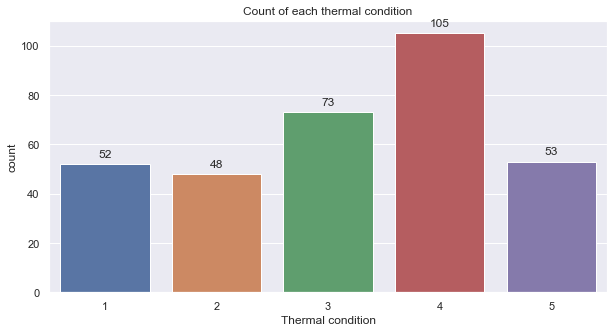

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="thermal_condition", data=data)
ax.set_title('Count of each thermal condition')
ax.set_xlabel('Thermal condition')
for p in ax.patches: 
                ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [9]:
# plt.figure(figsize=(15,10))
# plt.tight_layout()
# sns.distplot(data_1['thermal_condition'])

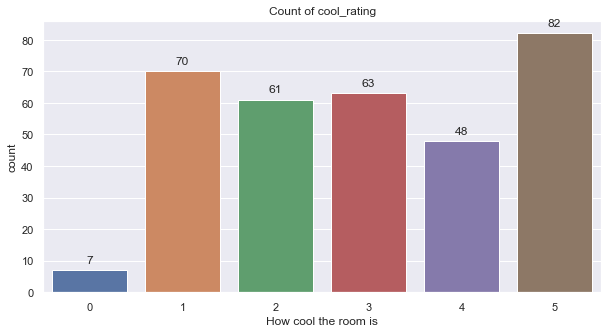

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="cool_rating", data=data)
ax.set_title('Count of cool_rating')
ax.set_xlabel('How cool the room is')
for p in ax.patches: 
                ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

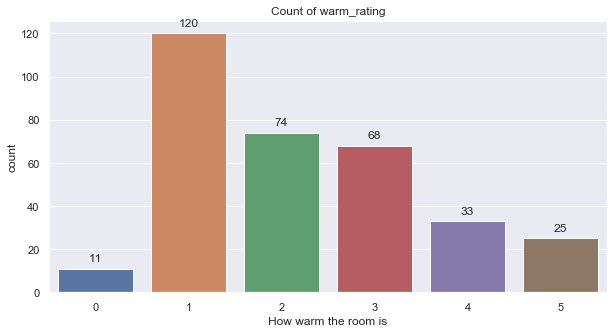

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="warm_rating", data=data)
ax.set_title('Count of warm_rating')
ax.set_xlabel('How warm the room is')
for p in ax.patches: 
                ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

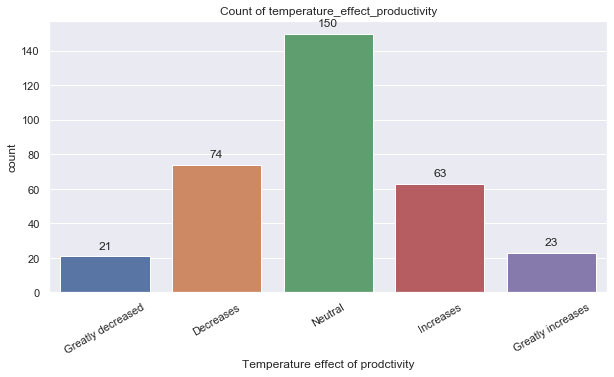

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="temperature_effect_productivity", data=data)
ax.set_title('Count of temperature_effect_productivity')
ax.set_xlabel('Temperature effect of prodctivity')
labels=['Greatly decreased','Decreases','Neutral','Increases','Greatly increases']
ax.set_xticklabels(labels)
for p in ax.patches: 
                ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=30)

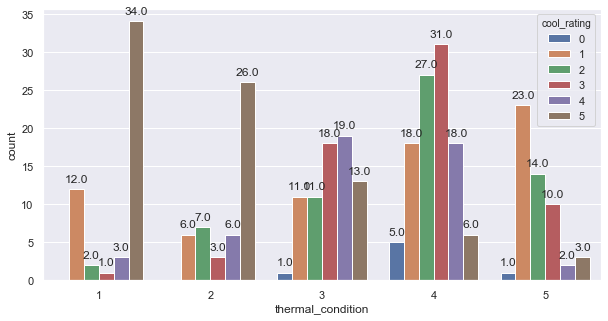

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="thermal_condition", hue="cool_rating", data=data)
# ax.set_title('Thermal condition')
for p in ax.patches: 
                ax.annotate(np.round(p.get_height(),decimals=0), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


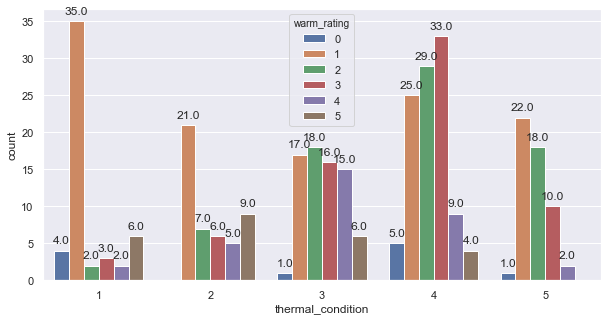

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="thermal_condition", hue="warm_rating", data=data)
for p in ax.patches: 
                ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



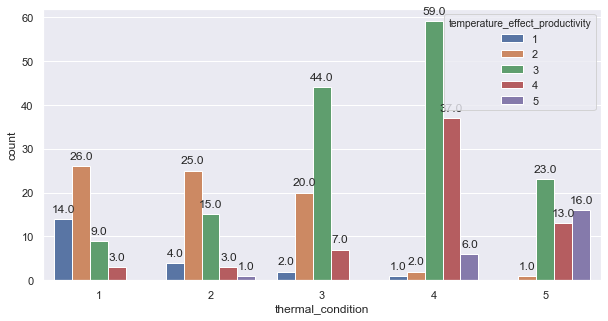

In [15]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="thermal_condition", hue="temperature_effect_productivity", data=data)
for p in ax.patches: 
                ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


## Analysis of Thermal_condition relation with  workspace_rating

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,r2_score

In [17]:
columns=['thermal_condition','workspace_rating']
data_1=data_original[columns]

In [18]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 2 columns):
thermal_condition    485 non-null float64
workspace_rating     485 non-null float64
dtypes: float64(2)
memory usage: 11.7 KB


In [19]:
data_1["thermal_condition"] = pd.to_numeric(data_1["thermal_condition"])

/Users/sivateja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
pearsoncorr = data_1.corr(method='pearson')
pearsoncorr

,thermal_condition,workspace_rating
thermal_condition,1.000000,0.439096
workspace_rating,0.439096,1.000000


In [21]:
data_1=data_1.dropna()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_1['thermal_condition'], data_1['workspace_rating'], test_size=0.3, random_state=1)

In [23]:
#print("Linear Regression")
X_train=X_train.values.reshape(-1, 1)
y_train=y_train.values.reshape(-1, 1)
X_test=X_test.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE for LR: %.2f" %mean_squared_error(y_test,y_pred))

MSE for LR: 0.69


In [24]:
lr.coef_

array([[0.32856779]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_1['workspace_rating'], data_1['thermal_condition'], test_size=0.3, random_state=1)

In [26]:
#print("Linear Regression")
X_train=X_train.values.reshape(-1, 1)
y_train=y_train.values.reshape(-1, 1)
X_test=X_test.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE for LR: %.2f" %mean_squared_error(y_test,y_pred))

MSE for LR: 1.37


In [27]:
lr.coef_

array([[0.64469574]])

<font color='red'>From the coffeicents we can say that there is proportional relation between the workspace_rating and thermal_condition. 
As the rating of one increases the other also increases. </font>

## Analysis on effect of few variables on thermal condition

In [28]:
data_2=data_original.copy()

In [29]:
columns_2=['temperature_alter_ability','temperature_satisfaction','clothing_layers_need','outside_brake_need',
           'temperature_fluctuations_day','temperature_fluctuations_season','fan_usage','leave_workspace',
           'temperature_effect_productivity','thermal_condition']

In [30]:
data_2=data_2[columns_2]

In [31]:
for i in data_2.columns:
    data_2[i] = pd.to_numeric(data_2[i])

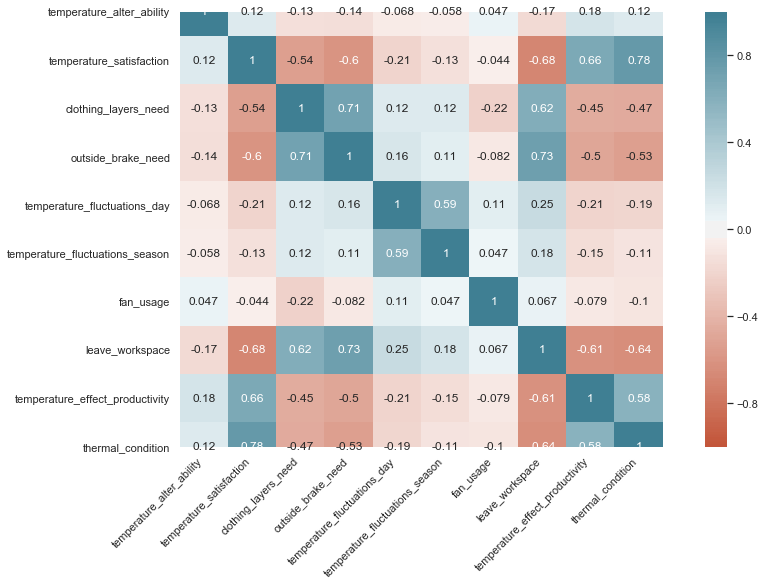

In [32]:
pearsoncorr = data_2.corr(method='pearson')
plt.figure(figsize=(15,8))
ax = sns.heatmap(
    pearsoncorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#sns.heatmap(pearsoncorr, annot = True)

In [33]:
data_2.shape

(499, 10)

In [34]:
data_3=data_2.copy()

In [35]:
data_3=data_3.dropna()
data_3.shape

(361, 10)

In [36]:
X=data_3.drop(columns=['thermal_condition'])
y=data_3[['thermal_condition']]

In [37]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

/Users/sivateja/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      thermal_condition   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     68.81
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           4.25e-72
Time:                        01:10:11   Log-Likelihood:                -427.79
No. Observations:                 361   AIC:                             875.6
Df Residuals:                     351   BIC:                             914.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.2992      0.356      3.650      0.000       0.599       1.999
temperature_alter_ability          -0.0060      0.035     -0.168      0.867      -0.076       0.064
temperature_satisfaction            0.6140      0.054     11.436      0.000       0.508       0.720
clothing_layers_need               -0.0647      0.046     -1.417      0.157      -0.154       0.025
outside_brake_need                 -0.0036      0.056     -0.065      0.948      -0.113       0.106
temperature_fluctuations_day        0.0221      0.054      0.411      0.682      -0.084       0.128
temperature_fluctuations_season    -0.0281      0.047     -0.601      0.548      -0.120       0.064
fan_usage                          -0.0783      0.040     -1.937      0.054      -0.158       0.001
leave_workspace                    -0.1115      0.064     -1.742      0.082      -0.237       0.014
temperature_effect_productivity     0.1977      0.061      3.242      0.001       0.078       0.318
==============================================================================
Omnibus:                       78.442   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.570
Skew:                          -0.774   Prob(JB):                     3.18e-94
Kurtosis:                       8.121   Cond. No.                         66.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'>From the above results the p values are very high for most of the variables. Even if we consider alpha level as 0.1,
temperature_satisfaction, leave_workspace, fan_usage, temperature_effect_productivity are the only variables which adds meaningful 
addition to the model. I going to check the results of the model by using only those three variables.</font>

In [38]:
X=data_3[['temperature_satisfaction','fan_usage','leave_workspace','temperature_effect_productivity']]
y=data_3[['thermal_condition']]
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      thermal_condition   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     154.9
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           1.30e-76
Time:                        01:10:11   Log-Likelihood:                -429.34
No. Observations:                 361   AIC:                             868.7
Df Residuals:                     356   BIC:                             888.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.1147      0.308      3.621      0.000       0.509       1.720
temperature_satisfaction            0.6271      0.052     12.115      0.000       0.525       0.729
fan_usage                          -0.0549      0.038     -1.464      0.144      -0.129       0.019
leave_workspace                    -0.1569      0.053     -2.959      0.003      -0.261      -0.053
temperature_effect_productivity     0.1985      0.061      3.279      0.001       0.079       0.318
==============================================================================
Omnibus:                       76.656   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.585
Skew:                          -0.776   Prob(JB):                     5.64e-86
Kurtosis:                       7.868   Cond. No.                         39.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'>From these two models we can see that R square value didn't change much. So we can say that out of all the variables
we selected for this, 'temperature_satisfaction','leave_workspace','temperature_effect_productivity' are the variables
that add a meaningful value to the model. So we can say that all the other varibles are stastically insignificant.</font>

<font color='red'>From the coefficients we can say that as the temperature_satisfaction and temperature_effect_productivity increases
the thermal condition also will increase. As the occupants are likely to leave the workspace it will have negative
impact on the thermal_condition.</font>

## Analysis of effect of few variables with workspace_rating

In [39]:
columns_3=['temperature_alter_ability','temperature_satisfaction','clothing_layers_need','outside_brake_need',
           'temperature_fluctuations_day','temperature_fluctuations_season','fan_usage','leave_workspace',
           'temperature_effect_productivity','workspace_rating']

In [40]:
data_4=data_original.copy()

In [41]:
data_4=data_4[columns_3]

In [42]:
data_4=data_4.dropna()

In [43]:
data_4.shape

(368, 10)

In [44]:
X=data_4.drop(columns=['workspace_rating'])
y=data_4[['workspace_rating']]

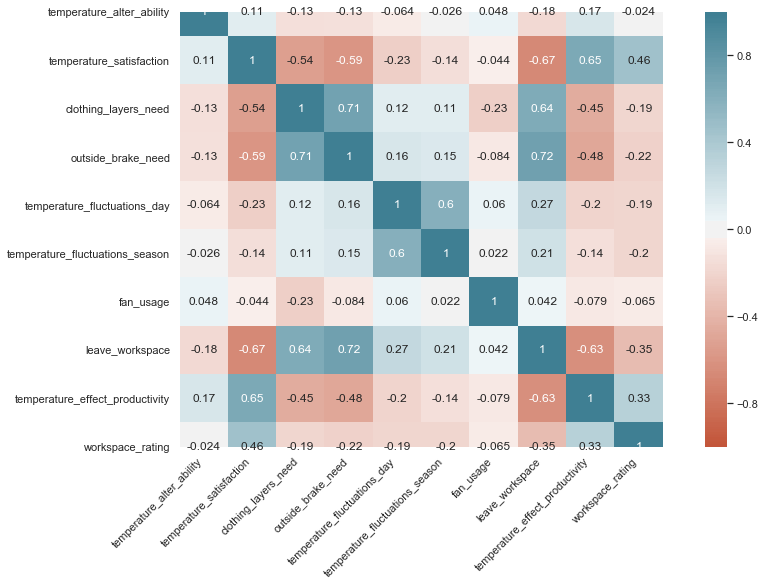

In [45]:
pearsoncorr = data_4.corr(method='pearson')
plt.figure(figsize=(15,8))
ax = sns.heatmap(
    pearsoncorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#sns.heatmap(pearsoncorr, annot = True)

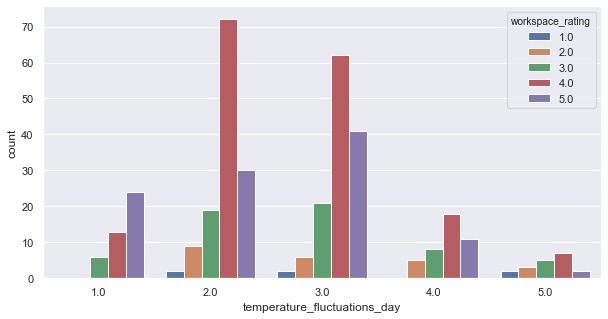

In [46]:
# plt.figure(figsize=(12,8))
# plt.scatter(data_4['temperature_satisfaction'],data_4['workspace_rating'], c='g')
# plt.xlabel('workspace_rating')
# plt.ylabel('temperature_satisfaction')
# plt.show()
plt.figure(figsize=(10,5))
ax = sns.countplot(x="temperature_fluctuations_day", hue="workspace_rating", data=data_4)

<font color='blue'>Linear regression</font>

In [47]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       workspace_rating   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     13.71
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           5.91e-19
Time:                        01:10:13   Log-Likelihood:                -437.53
No. Observations:                 368   AIC:                             895.1
Df Residuals:                     358   BIC:                             934.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.1948      0.346      9.222      0.000       2.514       3.876
temperature_alter_ability          -0.0644      0.035     -1.838      0.067      -0.133       0.005
temperature_satisfaction            0.3335      0.053      6.300      0.000       0.229       0.438
clothing_layers_need                0.0537      0.045      1.187      0.236      -0.035       0.143
outside_brake_need                  0.0890      0.055      1.621      0.106      -0.019       0.197
temperature_fluctuations_day       -0.0004      0.054     -0.008      0.993      -0.106       0.105
temperature_fluctuations_season    -0.1027      0.046     -2.217      0.027      -0.194      -0.012
fan_usage                           0.0009      0.040      0.024      0.981      -0.077       0.079
leave_workspace                    -0.1335      0.063     -2.103      0.036      -0.258      -0.009
temperature_effect_productivity     0.0306      0.061      0.506      0.613      -0.088       0.150
==============================================================================
Omnibus:                       23.537   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.691
Skew:                          -0.564   Prob(JB):                     9.70e-07
Kurtosis:                       3.731   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'>The R square value of this model is very less which shows that these variables are not explaining much in the variation of your dependent variable.</red> 

<font color='red'> Linear regression is not much useful for these variables. can try the logistic regression or plynomial regression for this data to see the relation between the variables.</red> 

## Analysis of controls impact on thermal_condition

In [48]:
columns_3=['blinds_control','overhead_lighting_control','task_light_control','temperature_control',
           'air_quality_control','other_control','no_control','thermal_condition','workspace_rating'] 

In [49]:
data_5=data_original.copy()

In [50]:
data_5=data_5[columns_3]

In [51]:
data_5=data_5.dropna()

In [52]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 498
Data columns (total 9 columns):
blinds_control               472 non-null object
overhead_lighting_control    472 non-null object
task_light_control           472 non-null object
temperature_control          472 non-null object
air_quality_control          472 non-null object
other_control                472 non-null object
no_control                   472 non-null object
thermal_condition            472 non-null float64
workspace_rating             472 non-null float64
dtypes: float64(2), object(7)
memory usage: 36.9+ KB


In [53]:
def get_totals_dictionary(ax):
    labels = ax.get_xticklabels() # get x labels

    heights = [(x.get_x(), x.get_height()) for x in ax.patches]
    #print(len(labels))
#     print(heights)
#     print(heights[1::len(labels)])
#     print('heights s1', heights[::len(labels)])
#     print('heights s2', heights[1::len(labels)])
#     print('heights s3', heights[2::len(labels)])
#     print('heights s4', heights[3::len(labels)])
#     print('heights s5', heights[4::len(labels)])
#     print('heights s6', heights[5::len(labels)])
#     print('heights s7', heights[6::len(labels)])
    response = dict()
    for x, y in zip(list(heights)[::len(labels)], list(heights)[1::len(labels)]):
        #print(x, '-', y)
        response[x[0]] = x[1] + y[1]
        response[y[0]] = response[x[0]]
    return response

In [54]:
def countplot(x_, hue_, data_, figsize_):
    plt.subplots(figsize=figsize_)
    
    if hue_ is None:
        ax = sns.countplot(x=x_, data = data_)
    else:
        ax = sns.countplot(x=x_, hue=hue_, data = data_)        
    
    labels = ax.get_xticklabels() # get x labels
    patch_totals = get_totals_dictionary(ax)
    patch_i = 0
    for p in ax.patches:
        ax.annotate('{:.2f}% ({})'.format(p.get_height()*100/patch_totals[p.get_x()], p.get_height()),
                    (p.get_x() + p.get_width()/4, p.get_height()+2))
        ax.set_xticklabels(labels, rotation=0) # set new labels
        patch_i +=1


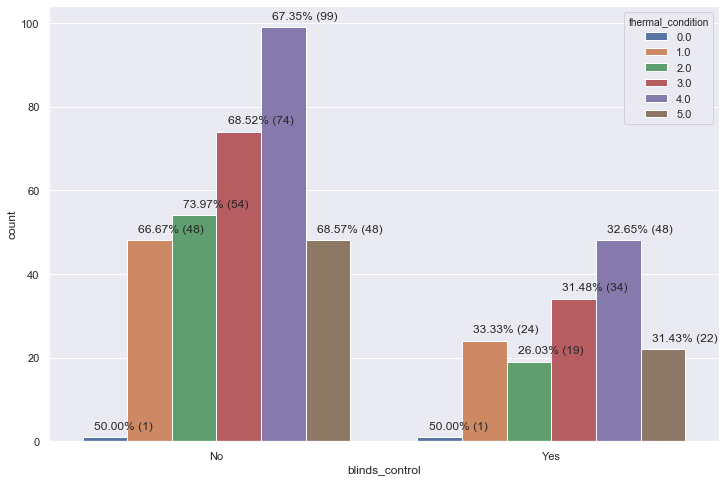

In [55]:
countplot('blinds_control', 'thermal_condition', data_5, (12,8))

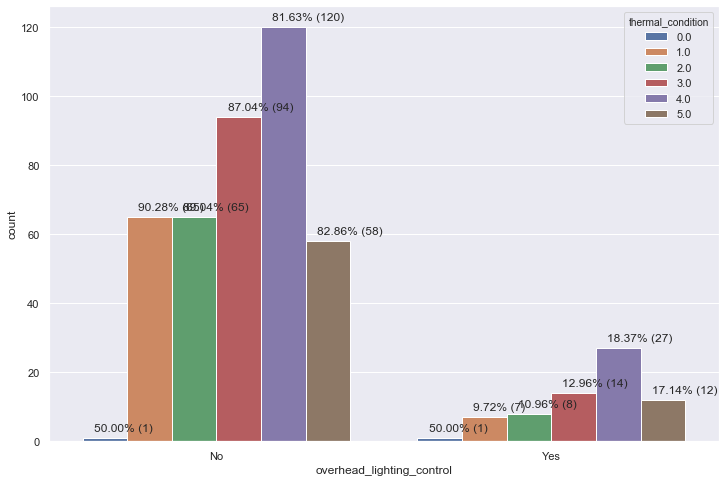

In [56]:
countplot('overhead_lighting_control', 'thermal_condition', data_5, (12,8))

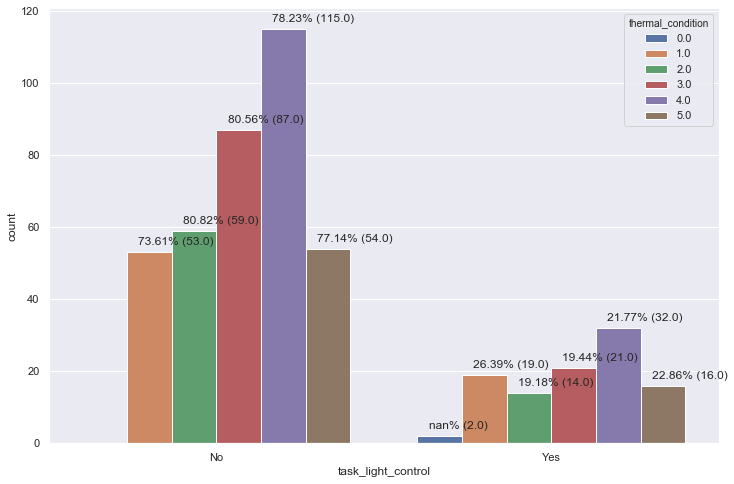

In [57]:
countplot('task_light_control', 'thermal_condition', data_5, (12,8))

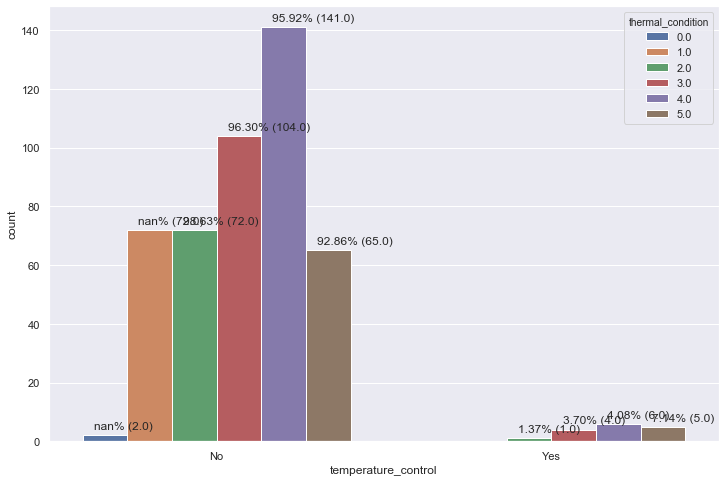

In [58]:
countplot('temperature_control', 'thermal_condition', data_5, (12,8))

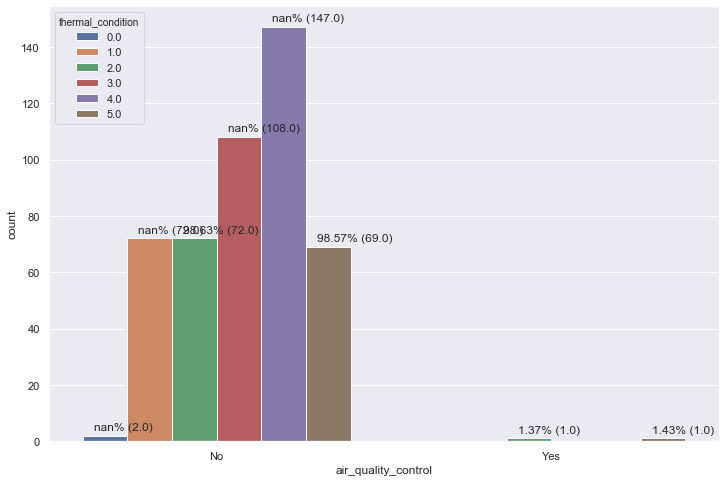

In [59]:
countplot('air_quality_control', 'thermal_condition', data_5, (12,8))

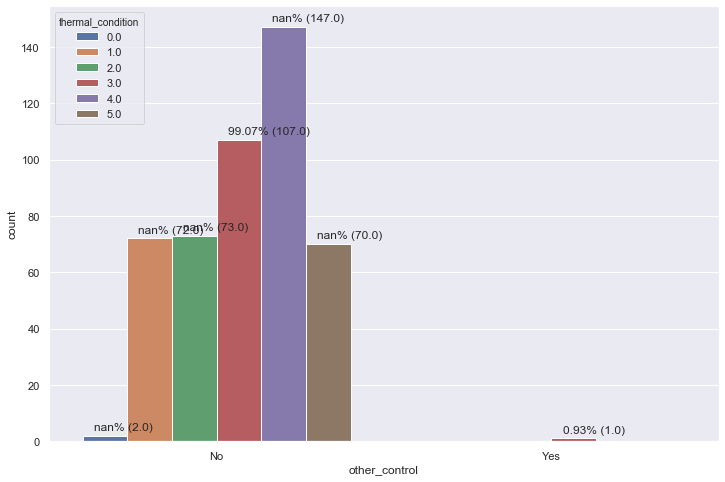

In [60]:
countplot('other_control', 'thermal_condition', data_5, (12,8))

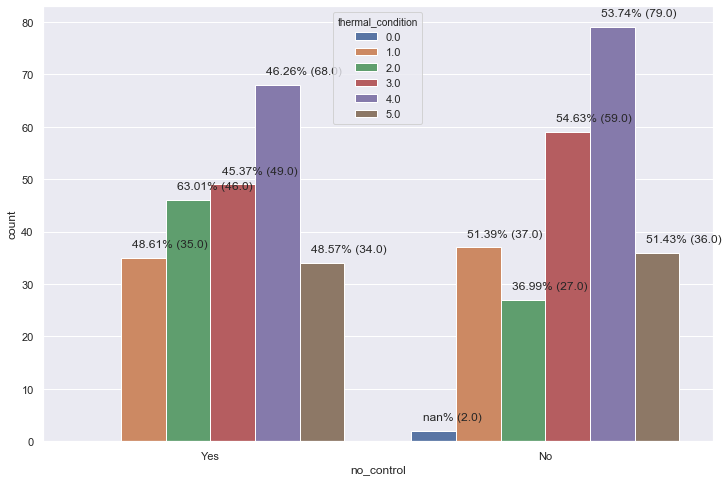

In [61]:
countplot('no_control', 'thermal_condition', data_5, (12,8))

## Analysis of controls impact on workspace_rating 

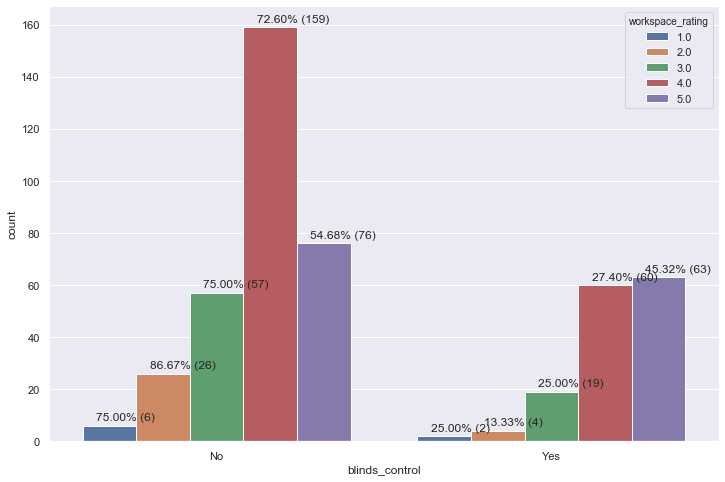

In [62]:
countplot('blinds_control', 'workspace_rating', data_5, (12,8))

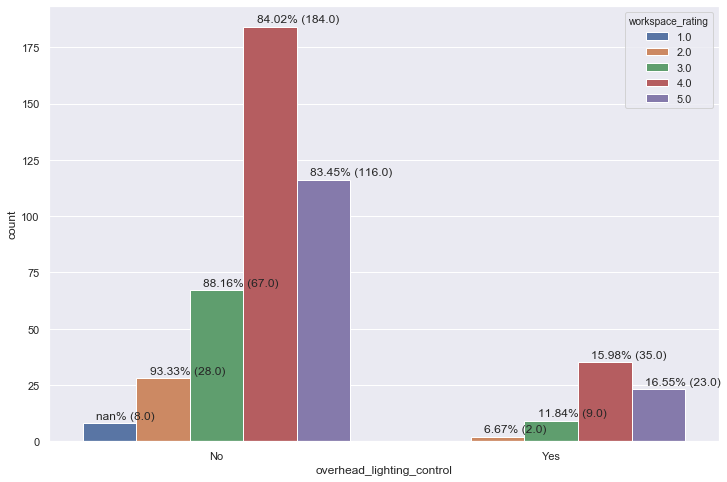

In [63]:
countplot('overhead_lighting_control', 'workspace_rating', data_5, (12,8))

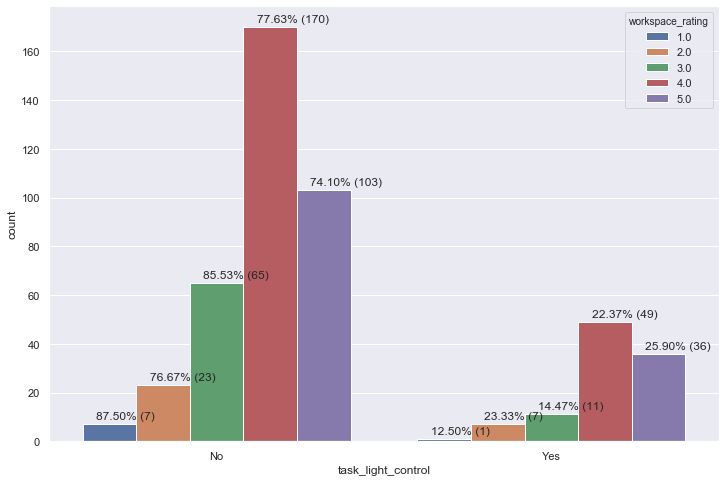

In [64]:
countplot('task_light_control', 'workspace_rating', data_5, (12,8))

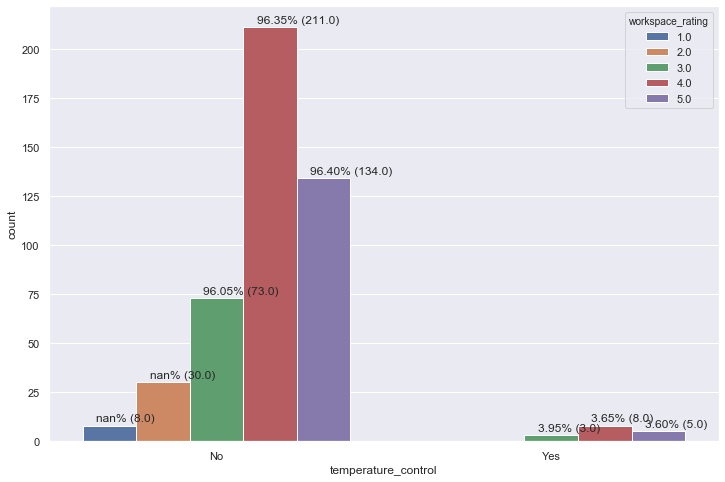

In [65]:
countplot('temperature_control', 'workspace_rating', data_5, (12,8))

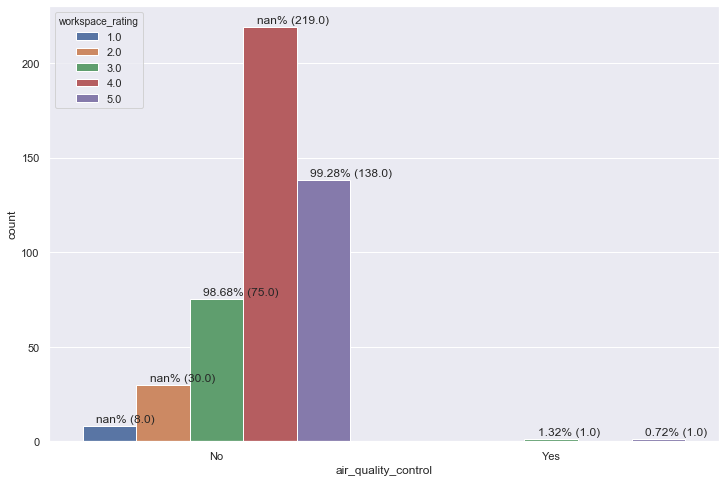

In [66]:
countplot('air_quality_control', 'workspace_rating', data_5, (12,8))

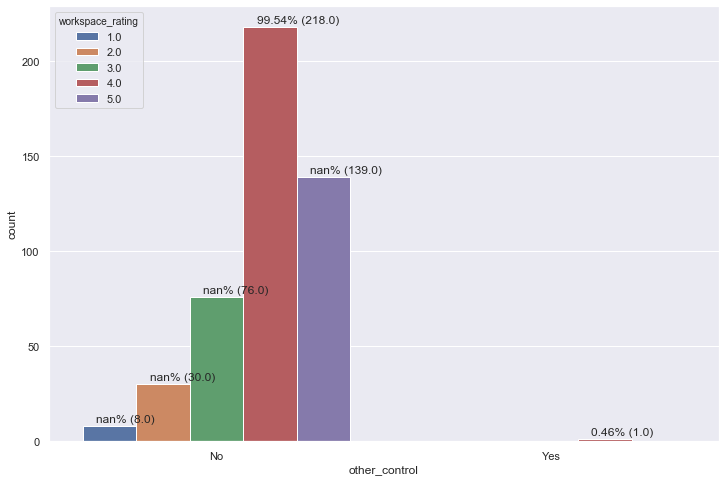

In [67]:
countplot('other_control', 'workspace_rating', data_5, (12,8))

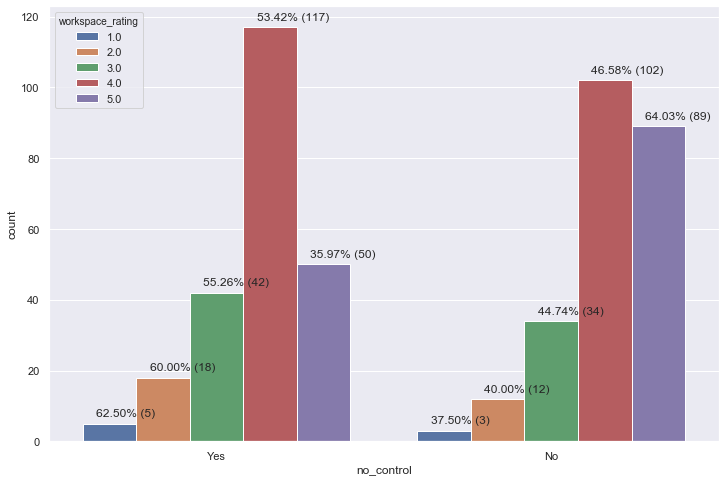

In [68]:
countplot('no_control', 'workspace_rating', data_5, (12,8))

Logistic regression for controls and workspace rating and thermal conditions

In [73]:
data_6=data_5.copy()

data_6=data_6.replace({'Yes':1, 'No': 0})
data_6.head()

,blinds_control,overhead_lighting_control,task_light_control,temperature_control,air_quality_control,other_control,no_control,thermal_condition,workspace_rating
0,0,0,0,0,0,0,1,1.0,1.0
1,0,1,0,0,0,0,0,2.0,3.0
2,0,0,0,0,0,0,1,4.0,4.0
3,0,1,0,0,0,0,0,4.0,4.0
4,0,0,0,0,0,0,1,4.0,4.0


In [74]:
X=data_6.drop(columns=['thermal_condition','workspace_rating'])
y=data_6[['workspace_rating']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.36619718309859156


/Users/sivateja/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for i in ['blinds_control','overhead_lighting_control','task_light_control','temperature_control',
           'air_quality_control','other_control','no_control']:
    data_5[i]=data_5[i].astype('category')

In [ ]:
data_5.info()

In [ ]:
X=data_5.drop(columns=['thermal_condition','workspace_rating'])
y=data_5[['workspace_rating']]


In [ ]:
#X=X.replace({'Yes':1, 'No':0})
for i in ['blinds_control','overhead_lighting_control','task_light_control','temperature_control',
           'air_quality_control','other_control','no_control']:
    X[i]=X[i].astype('category')
X.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Decision Tree Classifier")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#y-pred - same as above
y_pred = clf.predict(X_test)

#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="weighted"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred , average="weighted"))
print("F1-score:  %0.2f" %f1_score(y_test, y_pred , average="weighted"))

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [79]:
data_original.head()

,survey_id,building_name,office_spending_space,personal_workspace,in_out_office,window_distance,exterior_view,sky_view,Parking_view,other_buildings_view,...,air_quality_control,other_control,no_control,hours_spend,work_time,work_type,work_building_tenure,workspace_tenure,age_range,gender
0,13956599,A,Personal workspace,Open Office_1,Yes,4,Yes,No,No,Yes,...,No,No,Yes,4.0,All day,Typing,2.0,2.0,2.0,Male
1,13953638,A,Personal workspace,Enclosed Office_1,Yes,4,No,No,No,Yes,...,No,No,No,4.0,All day,Typing,2.0,2.0,3.0,Male
2,13954976,A,Personal workspace,Open Office_1,Yes,4,Yes,No,No,Yes,...,No,No,Yes,4.0,All day,Typing,2.0,2.0,3.0,Male
3,13955483,A,Personal workspace,Enclosed Office_2,Yes,1,Yes,Yes,Yes,Yes,...,No,No,No,4.0,All day,Typing,1.0,1.0,3.0,Female
4,13957165,A,Personal workspace,Open Office_1,Yes,4,Yes,Yes,Yes,Yes,...,No,No,Yes,4.0,All day,Writing,2.0,1.0,2.0,Male


## Comparision of gender and age with ratings

In [81]:
data_7=data_original[data_original['gender']!='Other']

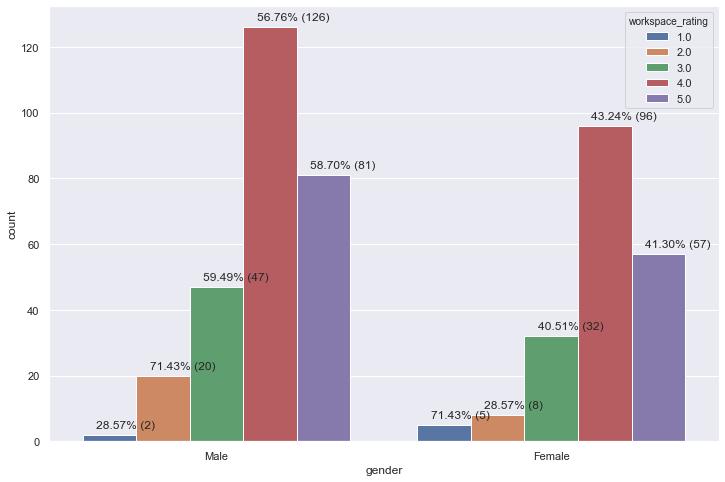

In [82]:
countplot('gender', 'workspace_rating', data_7, (12,8))

([<matplotlib.axis.XTick at 0x12d4d7710>,
 <a list of 5 Text xticklabel objects>)

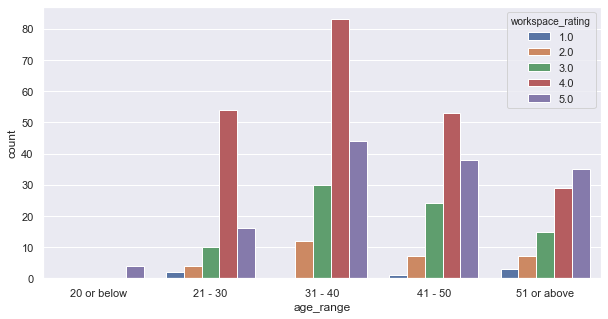

In [92]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="age_range", hue="workspace_rating", data=data_original)
positions = (0, 1, 2, 3, 4)
labels = ('20 or below', '21 - 30', '31 - 40', '41 - 50','51 or above')
plt.xticks(positions, labels)

In [115]:
data_age=data_8[data_8['age_range']==5]
X=data_age[['temperature_alter_ability','temperature_satisfaction','temperature_effect_productivity','temperature_control']]
X.head()

,temperature_alter_ability,temperature_satisfaction,temperature_effect_productivity,temperature_control
8,1.0,2.0,2.0,No
10,1.0,2.0,2.0,No
15,1.0,2.0,2.0,No
30,3.0,NaN,2.0,No
34,0.0,3.0,2.0,No


Regression analysis based on the age groups

In [101]:
import pandas as pd
import matplotlib.pyplot as plt,mpld3
import numpy as np
from ipywidgets import widgets, interactive, IntSlider
import requests
import time
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly

In [188]:
style = {'description_width': 'initial','handle_color' : 'lightblue'}
age_range = widgets.Dropdown(
    options=['All','20 or below', '21 - 30', '31 - 40', '41 - 50','51 or above'],
    value='All',
    description='Age Range: ',
)
gender=widgets.ToggleButtons(
    options=["All", 'Male', 'Female'],
    description='Gender : ',
    value='All',
    disabled=False,
    button_style='', 
)
outcome_var = widgets.Dropdown(
    options=data_original.columns,
    value='workspace_rating',
    description='Outcome Variable : ',
    style=style
)
dependent_var=widgets.SelectMultiple(
    options=data_original.columns,
    description='Dependent Variable: ',
    value=['temperature_alter_ability'],
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    #tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)
def linearregression(age_range,gender, outcome_var,dependent_var):
    data_8=data_original.copy()
    data_8=data_8.dropna()
    if gender=='All':
        if age_range=='All':
            data_age=data_8.copy()
        elif age_range=='20 or below':
            data_age=data_8[data_8['age_range']==1]
        elif age_range=='21 - 30':
            data_age=data_8[data_8['age_range']==2]
        elif age_range=='31 - 40':
            data_age=data_8[data_8['age_range']==3]
        elif age_range=='41 - 50':
            data_age=data_8[data_8['age_range']==4]
        elif age_range=='51 or above':
            data_age=data_8[data_8['age_range']==5]
    elif gender=='Male':
        if age_range=='All':
            data_age=data_8.copy()
            data_age=data_age[data_age['gender']=='Male']
        elif age_range=='20 or below':
            data_age=data_8[data_8['age_range']==1]
            data_age=data_age[data_age['gender']=='Male']
        elif age_range=='21 - 30':
            data_age=data_8[data_8['age_range']==2]
            data_age=data_age[data_age['gender']=='Male']
        elif age_range=='31 - 40':
            data_age=data_8[data_8['age_range']==3]
            data_age=data_age[data_age['gender']=='Male']
        elif age_range=='41 - 50':
            data_age=data_8[data_8['age_range']==4]
            data_age=data_age[data_age['gender']=='Male']
        elif age_range=='51 or above':
            data_age=data_8[data_8['age_range']==5] 
            data_age=data_age[data_age['gender']=='Male']
    elif gender=='Female':
        if age_range=='All':
            data_age=data_8.copy()
            data_age=data_age[data_age['gender']=='Female']
        elif age_range=='20 or below':
            data_age=data_8[data_8['age_range']==1]
            data_age=data_age[data_age['gender']=='Female']
        elif age_range=='21 - 30':
            data_age=data_8[data_8['age_range']==2]
            data_age=data_age[data_age['gender']=='Female']
        elif age_range=='31 - 40':
            data_age=data_8[data_8['age_range']==3]
            data_age=data_age[data_age['gender']=='Female']
        elif age_range=='41 - 50':
            data_age=data_8[data_8['age_range']==4]
            data_age=data_age[data_age['gender']=='Female']
        elif age_range=='51 or above':
            data_age=data_8[data_8['age_range']==5] 
            data_age=data_age[data_age['gender']=='Female']
    print("Total number of records: " + str(data_age.shape[0]))
    print("--------------------------------------------------------")
    if len(data_age)!=0:
        lr=LinearRegression()
        X=data_age[list(dependent_var)]
        y=data_age[[outcome_var]]
        non_int_var=0
        non_int_var_list=[]
        for i in list(dependent_var):
            a=X[i].dtypes
            if a != 'int64' and a != 'float64':
                print("Selcted algoritham won't support data types other than numeric ")
                non_int_var=non_int_var+1
                non_int_var_list.append(i)
        dependent_int = [x for x in list(dependent_var) if x not in non_int_var_list]
        print("Number of dependent variables selected: "+ str(len(dependent_var)))
        print("Dependent variables selected: " + str(dependent_int))
        print("Number of non numeric variables selected: " + str(non_int_var))
        print("Non numeric dependent variables selected: "+ str(non_int_var_list))
        print("--------------------------------------------------------")
        if non_int_var==0:
            lr=lr.fit(X,y)
            i=1
            while i<=len(dependent_var):
                print("Coefficient of " + dependent_var[i-1] +" : "+  str(round((lr.coef_[0][i-1]),4)))
                i += 1
    else:
        print("There are no data points available for the option you selected")
interactive(linearregression, age_range=age_range, gender=gender, outcome_var=outcome_var, dependent_var=dependent_var)

interactive(children=(Dropdown(description='Age Range: ', options=('All', '20 or below', '21 - 30', '31 - 40',…

In [142]:
dependent_var
print(dependent_var.value)

('workspace_tenure',)


In [172]:
a=data_8['no_control'].dtypes
print(a)
if a=='int64':
    print('Success')
else:
    print('Fail')

object
Fail
